In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
import os

In [13]:
files = []
for file in os.listdir("."):
    if file.endswith(".csv"):
        files.append(file)

### Załadowanie plików

In [14]:
file = pd.read_csv(files[0])
for path in files[1:]:
    file = file.append(pd.read_csv(path))

In [15]:
file.count()

name            436131
genderRank      436131
divRank         436131
overallRank     436131
bib             436131
division        436131
age             436131
state           436042
country         436131
profession      436131
points          436131
swim            436131
swimDistance    436131
t1              436131
bike            436131
bikeDistance    436131
t2              436131
run             436131
runDistance     436131
overall         436131
dtype: int64

In [16]:
im = file[["division","age","country","swim","bike","run","overall"]]

In [17]:
im.dtypes

division    object
age         object
country     object
swim        object
bike        object
run         object
overall     object
dtype: object

### Zmiana typów

In [9]:
im.age = im.age.astype(int)

ValueError: invalid literal for int() with base 10: '---'

### Ups. Najpierw filtrowanie brudów

In [18]:
im.shape

(436131, 7)

In [19]:
im.age[0:10]

0    ---
1    ---
2    ---
3    ---
4    ---
5    ---
6    ---
7    ---
8    ---
9    ---
Name: age, dtype: object

In [20]:
im[im.age != "---"].shape

(367229, 7)

In [21]:
im.groupby(["age"]).count()[:10]

,division,country,swim,bike,run,overall
age,,,,,,
---,68902,68902,68902,68902,68902,68902
-1,5,5,5,5,5,5
-4,1,1,1,1,1,1
0,84,84,84,84,84,84
1,132,132,132,132,132,132
10,1,1,1,1,1,1
101,1,1,1,1,1,1
103,1,1,1,1,1,1
108,1,1,1,1,1,1


In [22]:
im.groupby(["division"]).count()

,age,country,swim,bike,run,overall
division,,,,,,
18-24,11151,11151,11151,11151,11151,11151
25-29,37101,37101,37101,37101,37101,37101
30-34,67897,67897,67897,67897,67897,67897
35-39,83068,83068,83068,83068,83068,83068
40-44,90629,90629,90629,90629,90629,90629
45-49,66976,66976,66976,66976,66976,66976
50-54,40576,40576,40576,40576,40576,40576
55-59,17239,17239,17239,17239,17239,17239
60-64,7397,7397,7397,7397,7397,7397


### Division to jednak lepszy wybór ^^ czas zrobić porządek w kolumnach

In [23]:
im = im[im.overall != "DNF"]

In [24]:
im = im[im.overall != "DNS"]

In [25]:
im = im[im.overall != "---"]

In [26]:
im = im[im.overall != "DSQ"]

In [27]:
im = im[im.overall != "DQ"]

In [28]:
im_swim = im[im.swim != "---"][["division","swim"]]

In [29]:
im_bike = im[im.bike != "---"][["division","bike"]]

In [30]:
im_run = im[im.run != "---"][["division","run"]]

In [31]:
im.overall = pd.to_timedelta(im.overall)

In [32]:
im_swim.swim = pd.to_timedelta(im_swim.swim)

In [33]:
im_bike.bike = pd.to_timedelta(im_bike.bike)

In [34]:
im_run.run = pd.to_timedelta(im_run.run)

In [35]:
im.dtypes

division             object
age                  object
country              object
swim                 object
bike                 object
run                  object
overall     timedelta64[ns]
dtype: object

In [36]:
im[0:4]

,division,age,country,swim,bike,run,overall
2,18-24,---,AUS,01:01:29,05:31:53,04:05:52,10:39:14
3,30-34,---,AUS,01:06:17,---,10:47:47,10:47:47
4,50-54,---,NZL,01:03:11,05:44:58,04:57:03,11:45:12
6,40-44,---,---,00:58:06,06:01:59,04:52:01,11:52:06


### Zamiana na int64

In [37]:
im["overall_as_int"] = im.overall.astype(np.int64)

In [38]:
im_swim["swim_as_int"] = im_swim.swim.astype(np.int64)

In [39]:
im_bike["bike_as_int"] = im_bike.bike.astype(np.int64)

In [40]:
im_run["run_as_int"] = im_run.run.astype(np.int64)

### Analiza

In [41]:
overall_stats = im[["division","overall_as_int"]].groupby("division").agg(['mean','median', 'std', 'min', 'max', ])

In [42]:
swim_stats = im_swim[["division","swim_as_int"]].groupby("division").agg(['mean','median', 'std', 'min', 'max', ])

In [43]:
bike_stats = im_bike[["division","bike_as_int"]].groupby("division").agg(['mean','median', 'std', 'min', 'max', ])

In [44]:
run_stats = im_run[["division","run_as_int"]].groupby("division").agg(['mean','median', 'std', 'min', 'max', ])

In [45]:
overall_stats

overall_as_int                                                \
                   mean          median           std             min   
division                                                                
18-24      4.482157e+13  44376000000000  7.028576e+12   3463000000000   
25-29      4.416673e+13  43584000000000  6.793374e+12   4228000000000   
30-34      4.397958e+13  43323000000000  6.727521e+12   3215000000000   
35-39      4.424220e+13  43632000000000  6.643727e+12   3260000000000   
40-44      4.490333e+13  44427000000000  6.520660e+12   3217000000000   
45-49      4.576065e+13  45424000000000  6.456514e+12   3143000000000   
50-54      4.688096e+13  46602000000000  6.573667e+12   3504000000000   
55-59      4.833217e+13  48380000000000  6.456583e+12   4627000000000   
60-64      4.998778e+13  50281000000000  6.560076e+12   5065000000000   
65-69      5.159196e+13  52050000000000  6.327558e+12   6051000000000   
70-74      5.396199e+13  54745000000000  5.527202e+12   5801000000000   
75-79      5.694721e+13  57620500000000  4.562806e+12  28213000000000   
80-84      5.844592e+13  59287000000000  2.245317e+12  53859000000000   
PC         4.799976e+13  48264000000000  7.281680e+12  32575000000000   
PRO        3.409550e+13  33795500000000  3.823769e+12   2788000000000   
XC         4.473679e+13  43655000000000  5.782541e+12  36142000000000   
nknown     4.571218e+13  44700500000000  5.925916e+12  37815000000000   

                          
                     max  
division                  
18-24     61165000000000  
25-29     62125000000000  
30-34     63486000000000  
35-39     62113000000000  
40-44     63388000000000  
45-49     63084000000000  
50-54     71745000000000  
55-59     61480000000000  
60-64     61763000000000  
65-69     62080000000000  
70-74     61322000000000  
75-79     61795000000000  
80-84     60690000000000  
PC        60900000000000  
PRO       62341000000000  
XC        57320000000000  
nknown    58048000000000

In [46]:
swim_stats

swim_as_int                                              \
                  mean         median           std            min   
division                                                             
18-24     4.353341e+12  4258000000000  8.223543e+11  1560000000000   
25-29     4.390978e+12  4302000000000  8.145858e+11  1359000000000   
30-34     4.441603e+12  4346000000000  8.179602e+11   465000000000   
35-39     4.514745e+12  4423000000000  8.200133e+11  1495000000000   
40-44     4.594644e+12  4506000000000  8.377751e+11  1495000000000   
45-49     4.683274e+12  4598000000000  8.579345e+11   465000000000   
50-54     4.796233e+12  4711000000000  8.853622e+11  1564000000000   
55-59     4.929736e+12  4853000000000  9.003325e+11  1714000000000   
60-64     5.141128e+12  5063000000000  9.519935e+11  1840000000000   
65-69     5.465584e+12  5415000000000  9.758727e+11  2067000000000   
70-74     5.765852e+12  5726500000000  9.714583e+11  2346000000000   
75-79     6.078299e+12  6261000000000  1.031841e+12  3076000000000   
80-84     6.738909e+12  6890000000000  7.376676e+11  5256000000000   
PC        4.964628e+12  4922000000000  1.048578e+12  1681000000000   
PRO       3.383841e+12  3324500000000  4.534526e+11  1453000000000   
XC        4.583211e+12  4356000000000  8.414428e+11  3298000000000   
nknown    4.925929e+12  4993500000000  8.860424e+11  3383000000000   

                          
                     max  
division                  
18-24      8447000000000  
25-29      9062000000000  
30-34     26001000000000  
35-39     26324000000000  
40-44     27832000000000  
45-49     28150000000000  
50-54     10343000000000  
55-59      9250000000000  
60-64      8765000000000  
65-69      9098000000000  
70-74      9021000000000  
75-79      8214000000000  
80-84      7753000000000  
PC         8374000000000  
PRO        6455000000000  
XC         6355000000000  
nknown     6600000000000

In [47]:
bike_stats

bike_as_int                                                \
                  mean          median           std             min   
division                                                               
18-24     2.272341e+13  22384000000000  3.086245e+12   8484000000000   
25-29     2.241284e+13  22028000000000  3.084899e+12   8492000000000   
30-34     2.225969e+13  21874000000000  3.037737e+12   8460000000000   
35-39     2.227870e+13  21901000000000  2.979363e+12   8158000000000   
40-44     2.247691e+13  22135000000000  2.955524e+12   7913000000000   
45-49     2.275032e+13  22461500000000  2.942113e+12   8486000000000   
50-54     2.318720e+13  22925500000000  3.004349e+12   8516000000000   
55-59     2.376626e+13  23658000000000  2.916333e+12   8726000000000   
60-64     2.439775e+13  24419000000000  2.961355e+12   9113000000000   
65-69     2.509710e+13  25148500000000  2.835505e+12   9547000000000   
70-74     2.605564e+13  26147000000000  2.461379e+12  13050000000000   
75-79     2.679257e+13  27202000000000  2.291439e+12  13106000000000   
80-84     2.743467e+13  27559500000000  1.447914e+12  24108000000000   
PC        2.631238e+13  26219000000000  3.858743e+12  18304000000000   
PRO       1.828604e+13  18155000000000  1.647289e+12   7939000000000   
XC        2.190979e+13  21529000000000  2.050002e+12  18925000000000   
nknown    2.247729e+13  22187000000000  2.567218e+12  18330000000000   

                          
                     max  
division                  
18-24     34372000000000  
25-29     34528000000000  
30-34     52501000000000  
35-39     34806000000000  
40-44     34488000000000  
45-49     33986000000000  
50-54     54027000000000  
55-59     33843000000000  
60-64     32311000000000  
65-69     33243000000000  
70-74     32325000000000  
75-79     30923000000000  
80-84     29712000000000  
PC        34835000000000  
PRO       30015000000000  
XC        25283000000000  
nknown    28809000000000

In [48]:
run_stats

run_as_int                                                \
                  mean          median           std             min   
division                                                               
18-24     1.718025e+13  16744500000000  3.798698e+12   3463000000000   
25-29     1.673303e+13  16253000000000  3.655327e+12   4228000000000   
30-34     1.667604e+13  16146000000000  3.780585e+12   3215000000000   
35-39     1.681700e+13  16288000000000  3.773327e+12   3260000000000   
40-44     1.715113e+13  16668000000000  3.733907e+12    436000000000   
45-49     1.757336e+13  17171000000000  3.688939e+12   3143000000000   
50-54     1.812092e+13  17745000000000  3.782589e+12   1334000000000   
55-59     1.883988e+13  18577000000000  3.738262e+12   4627000000000   
60-64     1.962889e+13  19510000000000  3.878059e+12    545000000000   
65-69     2.027751e+13  20192000000000  3.916221e+12   6051000000000   
70-74     2.127354e+13  21471000000000  3.146830e+12   5801000000000   
75-79     2.319650e+13  23184500000000  4.326676e+12   9952000000000   
80-84     2.371533e+13  23824000000000  1.821880e+12  20511000000000   
PC        1.559585e+13  14970000000000  5.803969e+12    450000000000   
PRO       1.220061e+13  11783500000000  2.276190e+12   2788000000000   
XC        1.761005e+13  17121000000000  3.144249e+12  13098000000000   
nknown    1.743821e+13  17404000000000  2.877830e+12  12657000000000   

                          
                     max  
division                  
18-24     56616000000000  
25-29     59295000000000  
30-34     60210000000000  
35-39     60828000000000  
40-44     61091000000000  
45-49     61169000000000  
50-54     61126000000000  
55-59     60431000000000  
60-64     57212000000000  
65-69     60285000000000  
70-74     47458000000000  
75-79     60217000000000  
80-84     26484000000000  
PC        28272000000000  
PRO       55374000000000  
XC        25087000000000  
nknown    25609000000000

In [49]:
overall_stats = overall_stats.apply(pd.to_timedelta)

In [50]:
swim_stats = swim_stats.apply(pd.to_timedelta)

In [51]:
bike_stats = bike_stats.apply(pd.to_timedelta)

In [52]:
run_stats = run_stats.apply(pd.to_timedelta)

In [53]:
overall_stats

overall_as_int                                                  
                    mean          median             std      min      max
division                                                                  
18-24    12:27:01.568490        12:19:36 01:57:08.576087 00:57:43 16:59:25
25-29    12:16:06.727107        12:06:24 01:53:13.374163 01:10:28 17:15:25
30-34    12:12:59.584931        12:02:03 01:52:07.521416 00:53:35 17:38:06
35-39    12:17:22.202333        12:07:12 01:50:43.727219 00:54:20 17:15:13
40-44    12:28:23.328387        12:20:27 01:48:40.659514 00:53:37 17:36:28
45-49    12:42:40.647101        12:37:04 01:47:36.514138 00:52:23 17:31:24
50-54    13:01:20.964234        12:56:42 01:49:33.666540 00:58:24 19:55:45
55-59    13:25:32.170593        13:26:20 01:47:36.582593 01:17:07 17:04:40
60-64    13:53:07.776485        13:58:01 01:49:20.075672 01:24:25 17:09:23
65-69    14:19:51.964582        14:27:30 01:45:27.557894 01:40:51 17:14:40
70-74    14:59:21.986644        15:12:25 01:32:07.201829 01:36:41 17:02:02
75-79    15:49:07.213235 16:00:20.500000 01:16:02.806450 07:50:13 17:09:55
80-84    16:14:05.916666        16:28:07 00:37:25.317044 14:57:39 16:51:30
PC       13:19:59.757575        13:24:24 02:01:21.679904 09:02:55 16:55:00
PRO      09:28:15.499851 09:23:15.500000 01:03:43.768797 00:46:28 17:19:01
XC       12:25:36.789473        12:07:35 01:36:22.541459 10:02:22 15:55:20
nknown   12:41:52.178571 12:25:00.500000 01:38:45.915538 10:30:15 16:07:28

In [54]:
overall_stats.drop(["nknown","XC","PRO","PC"])

overall_as_int                                                  
                    mean          median             std      min      max
division                                                                  
18-24    12:27:01.568490        12:19:36 01:57:08.576087 00:57:43 16:59:25
25-29    12:16:06.727107        12:06:24 01:53:13.374163 01:10:28 17:15:25
30-34    12:12:59.584931        12:02:03 01:52:07.521416 00:53:35 17:38:06
35-39    12:17:22.202333        12:07:12 01:50:43.727219 00:54:20 17:15:13
40-44    12:28:23.328387        12:20:27 01:48:40.659514 00:53:37 17:36:28
45-49    12:42:40.647101        12:37:04 01:47:36.514138 00:52:23 17:31:24
50-54    13:01:20.964234        12:56:42 01:49:33.666540 00:58:24 19:55:45
55-59    13:25:32.170593        13:26:20 01:47:36.582593 01:17:07 17:04:40
60-64    13:53:07.776485        13:58:01 01:49:20.075672 01:24:25 17:09:23
65-69    14:19:51.964582        14:27:30 01:45:27.557894 01:40:51 17:14:40
70-74    14:59:21.986644        15:12:25 01:32:07.201829 01:36:41 17:02:02
75-79    15:49:07.213235 16:00:20.500000 01:16:02.806450 07:50:13 17:09:55
80-84    16:14:05.916666        16:28:07 00:37:25.317044 14:57:39 16:51:30

In [55]:
overall_stats = overall_stats.drop(["nknown","XC","PRO","PC"])

In [56]:
swim_stats = swim_stats.drop(["nknown","XC","PRO","PC"])

In [57]:
bike_stats = bike_stats.drop(["nknown","XC","PRO","PC"])

In [58]:
run_stats = run_stats.drop(["nknown","XC","PRO","PC"])

In [59]:
overall_stats.index.values

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80-84'], dtype=object)

In [60]:
overall_stats

overall_as_int                                                  
                    mean          median             std      min      max
division                                                                  
18-24    12:27:01.568490        12:19:36 01:57:08.576087 00:57:43 16:59:25
25-29    12:16:06.727107        12:06:24 01:53:13.374163 01:10:28 17:15:25
30-34    12:12:59.584931        12:02:03 01:52:07.521416 00:53:35 17:38:06
35-39    12:17:22.202333        12:07:12 01:50:43.727219 00:54:20 17:15:13
40-44    12:28:23.328387        12:20:27 01:48:40.659514 00:53:37 17:36:28
45-49    12:42:40.647101        12:37:04 01:47:36.514138 00:52:23 17:31:24
50-54    13:01:20.964234        12:56:42 01:49:33.666540 00:58:24 19:55:45
55-59    13:25:32.170593        13:26:20 01:47:36.582593 01:17:07 17:04:40
60-64    13:53:07.776485        13:58:01 01:49:20.075672 01:24:25 17:09:23
65-69    14:19:51.964582        14:27:30 01:45:27.557894 01:40:51 17:14:40
70-74    14:59:21.986644        15:12:25 01:32:07.201829 01:36:41 17:02:02
75-79    15:49:07.213235 16:00:20.500000 01:16:02.806450 07:50:13 17:09:55
80-84    16:14:05.916666        16:28:07 00:37:25.317044 14:57:39 16:51:30

In [61]:
def timeTicks(x, pos):                                                                                                                                                                                                                                                         
    d = datetime.timedelta(seconds=x)                                                                                                                                                                                                                                          
    return str(d)                                                                                                                                                                                                                                                              
formatter = matplotlib.ticker.FuncFormatter(timeTicks)  

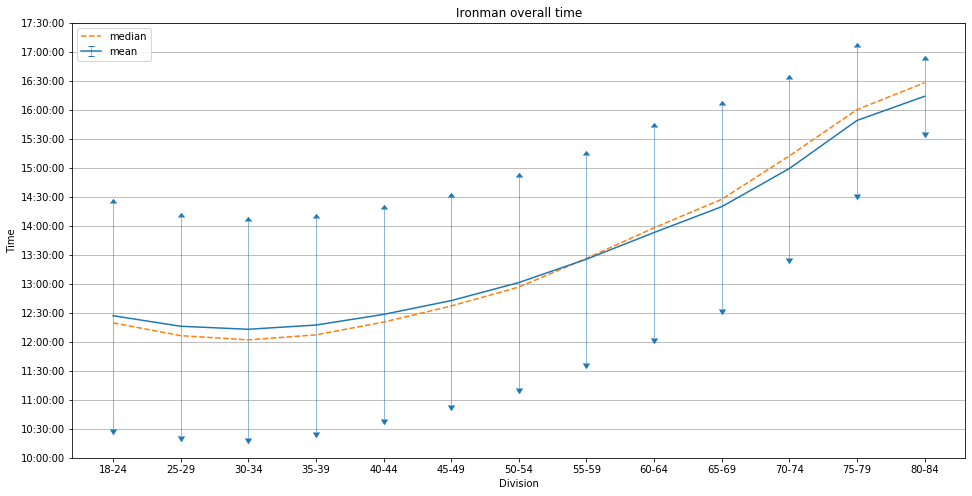

In [66]:
fig = plt.figure(figsize=(16,8))                                                                                                                                                                                                                                                            
ax = fig.add_subplot(111)   
x = overall_stats.index.values
y = overall_stats.overall_as_int["mean"] / np.timedelta64(1, 's')
yerr = overall_stats.overall_as_int["std"] / np.timedelta64(1, 's')
#plt.plot(stats_to_plot.overall_max / np.timedelta64(1, 's'),"--")
ax.errorbar(x, y, yerr, uplims=True, lolims=True, elinewidth =0.5, label="mean")
ax.plot(overall_stats.overall_as_int["median"] / np.timedelta64(1, 's'),"--", label="median")
ax.yaxis.set_major_formatter(formatter) 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Division")
plt.ylabel("Time")
plt.title("Ironman overall time")
plt.yticks(np.arange(10, 18, step=0.5)*60*60)
plt.grid(axis="y")
plt.savefig('ironman_overall.png')
plt.show()

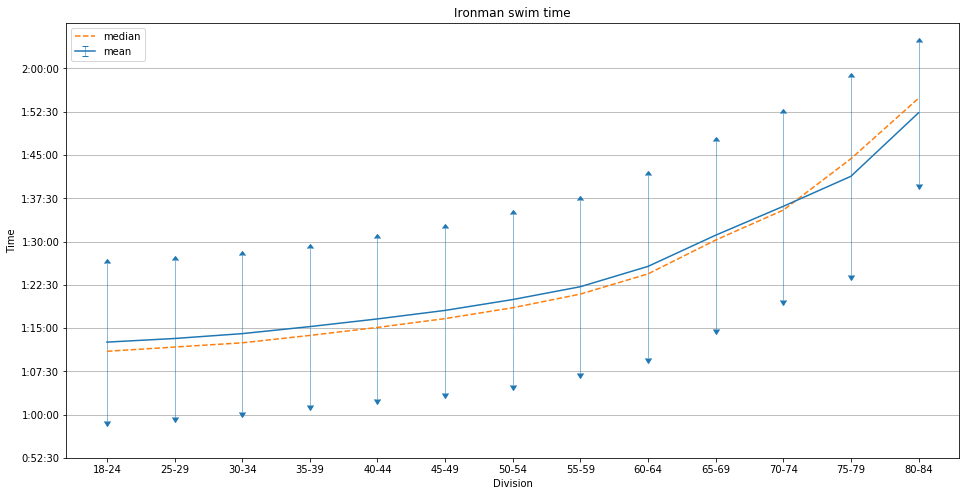

In [67]:
fig = plt.figure(figsize=(16,8))                                                                                                                                                                                                                                                       
ax = fig.add_subplot(111)   
x = overall_stats.index.values
y = swim_stats.swim_as_int["mean"] / np.timedelta64(1, 's')
yerr = swim_stats.swim_as_int["std"] / np.timedelta64(1, 's')
#plt.plot(stats_to_plot.overall_min / np.timedelta64(1, 's'),"--")
#plt.plot(stats_to_plot.overall_max / np.timedelta64(1, 's'),"--")
ax.errorbar(x, y, yerr, uplims=True, lolims=True, elinewidth =0.5, label="mean")
plt.plot(swim_stats.swim_as_int["median"] / np.timedelta64(1, 's'),"--", label="median")
ax.yaxis.set_major_formatter(formatter) 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Division")
plt.ylabel("Time")
plt.title("Ironman swim time")
plt.yticks(np.arange(0.875, 2.125, step=0.125)*60*60)
plt.grid(axis="y")
plt.savefig('ironman_swim.png')
plt.show()

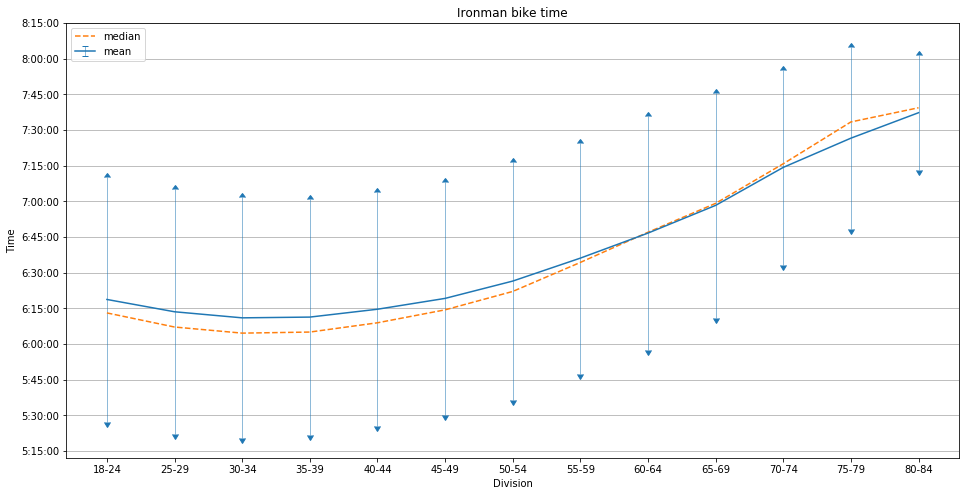

In [68]:
fig = plt.figure(figsize=(16,8))                                                                                                                                                                                                                                                                
ax = fig.add_subplot(111)   
x = overall_stats.index.values
y = bike_stats.bike_as_int["mean"] / np.timedelta64(1, 's')
yerr = bike_stats.bike_as_int["std"] / np.timedelta64(1, 's')
#plt.plot(stats_to_plot.overall_min / np.timedelta64(1, 's'),"--")
#plt.plot(stats_to_plot.overall_max / np.timedelta64(1, 's'),"--")
ax.errorbar(x, y, yerr, uplims=True, lolims=True, elinewidth =0.5, label="mean")
plt.plot(bike_stats.bike_as_int["median"] / np.timedelta64(1, 's'),"--", label="median")
ax.yaxis.set_major_formatter(formatter) 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Division")
plt.ylabel("Time")
plt.title("Ironman bike time")
plt.yticks(np.arange(5.25, 8.5, step=0.25)*60*60)
plt.grid(axis="y")
plt.savefig('ironman_bike.png')
plt.show()

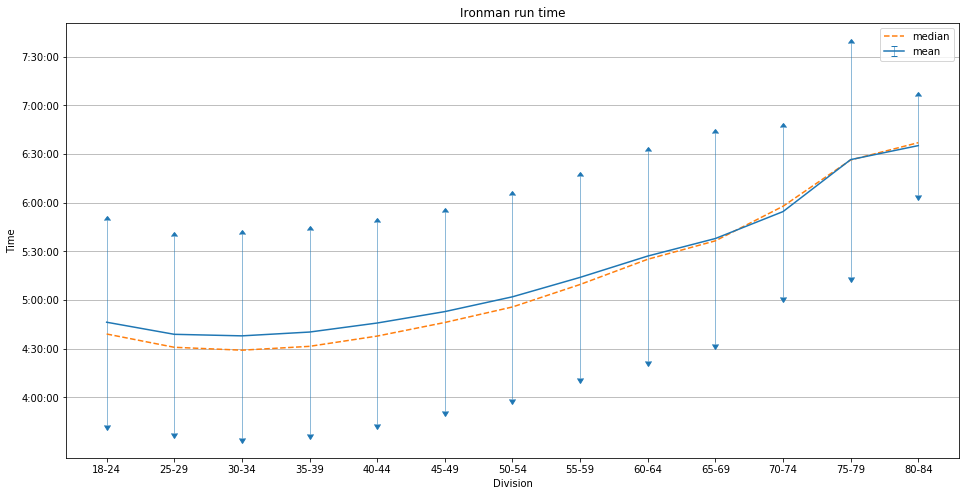

In [69]:
fig = plt.figure(figsize=(16,8))                                                                                                                                                                                                                                                       
ax = fig.add_subplot(111)   
x = overall_stats.index.values
y = run_stats.run_as_int["mean"] / np.timedelta64(1, 's')
yerr = run_stats.run_as_int["std"] / np.timedelta64(1, 's')
#plt.plot(stats_to_plot.overall_min / np.timedelta64(1, 's'),"--")
#plt.plot(stats_to_plot.overall_max / np.timedelta64(1, 's'),"--")
ax.errorbar(x, y, yerr, uplims=True, lolims=True, elinewidth =0.5, label="mean")
plt.plot(run_stats.run_as_int["median"] / np.timedelta64(1, 's'),"--", label="median")
ax.yaxis.set_major_formatter(formatter) 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Division")
plt.ylabel("Time")
plt.title("Ironman run time")
plt.yticks(np.arange(4, 7.75, step=0.5)*60*60)
plt.grid(axis="y")
plt.savefig('ironman_run.png')
plt.show()